<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/Contacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install emoji

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import emoji

from wordcloud import WordCloud,STOPWORDS

# Data cleaning

In [3]:
from google.colab import files

In [4]:
uploaded=files.upload()

Saving Connections.csv to Connections (4).csv


In [5]:
df = pd.read_csv('Connections.csv', skiprows=3, encoding = 'utf-8')
df.head(5)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Varun,Kumar,https://www.linkedin.com/in/kmvarun,NaN,Valorem Reply,Software Engineer,21 Apr 2025
1,William,Sandoval,https://www.linkedin.com/in/william-sandoval-b...,NaN,KTH Parts Industries Inc.,Simulation Engineer,21 Apr 2025
2,Tushaar,V,https://www.linkedin.com/in/tush9905,NaN,PowerCode.ai,Founder & Owner,20 Apr 2025
3,Dr. Manuel,Bachmann,https://www.linkedin.com/in/dr-manuel-bachmann...,NaN,Volksbank,Head of Risk Model Validation,20 Apr 2025
4,Andrew,Nuut,https://www.linkedin.com/in/andrew-nuut-38105a75,NaN,Nuutology Ltd,CVO - Chief Vision Officer,20 Apr 2025


In [6]:
# remove empty rows
df1 = df.dropna(subset=['First Name'])
df1.head(5)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Varun,Kumar,https://www.linkedin.com/in/kmvarun,NaN,Valorem Reply,Software Engineer,21 Apr 2025
1,William,Sandoval,https://www.linkedin.com/in/william-sandoval-b...,NaN,KTH Parts Industries Inc.,Simulation Engineer,21 Apr 2025
2,Tushaar,V,https://www.linkedin.com/in/tush9905,NaN,PowerCode.ai,Founder & Owner,20 Apr 2025
3,Dr. Manuel,Bachmann,https://www.linkedin.com/in/dr-manuel-bachmann...,NaN,Volksbank,Head of Risk Model Validation,20 Apr 2025
4,Andrew,Nuut,https://www.linkedin.com/in/andrew-nuut-38105a75,NaN,Nuutology Ltd,CVO - Chief Vision Officer,20 Apr 2025


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 0 to 2196
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     2177 non-null   object
 1   Last Name      2177 non-null   object
 2   URL            2177 non-null   object
 3   Email Address  60 non-null     object
 4   Company        2146 non-null   object
 5   Position       2146 non-null   object
 6   Connected On   2177 non-null   object
dtypes: object(7)
memory usage: 200.6+ KB


In [8]:
# Convert 'Connected On' column to datetime objects
df1.loc[:,'Connected On'] = pd.to_datetime(df1['Connected On'])

In [9]:
max(df1['Connected On'])

Timestamp('2025-04-21 00:00:00')

# Plot: New connections

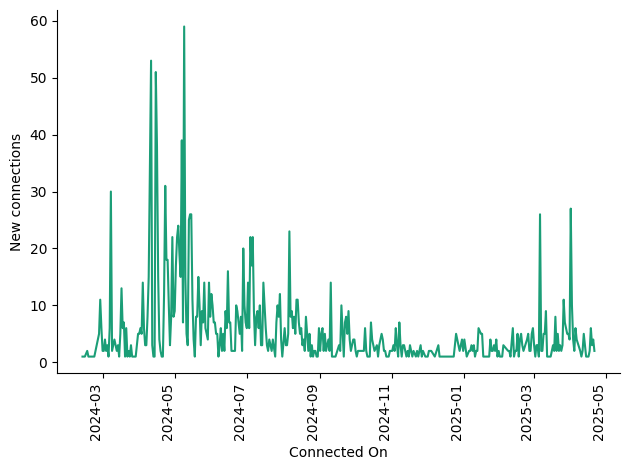

In [10]:
df1.groupby('Connected On').size().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.xlabel("Connected On") # Set x-axis label
plt.ylabel("New connections") # Set y-axis label
#plt.xlim(min(df1['Connected On']), max(df1['Connected On']))
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Names Cloud

In [35]:
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

def remove_dr(text):
  return text.replace("Dr.", "").replace("Dr ", "").replace('Prof.', '').replace('Prof ', '').title()

df1.loc[:,'Cleaned_Name'] = df1['First Name'].astype(str).apply(remove_emoji).apply(remove_dr)

In [12]:
df1.head(5)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On,Cleaned_Name
0,Varun,Kumar,https://www.linkedin.com/in/kmvarun,NaN,Valorem Reply,Software Engineer,2025-04-21 00:00:00,Varun
1,William,Sandoval,https://www.linkedin.com/in/william-sandoval-b...,NaN,KTH Parts Industries Inc.,Simulation Engineer,2025-04-21 00:00:00,William
2,Tushaar,V,https://www.linkedin.com/in/tush9905,NaN,PowerCode.ai,Founder & Owner,2025-04-20 00:00:00,Tushaar
3,Dr. Manuel,Bachmann,https://www.linkedin.com/in/dr-manuel-bachmann...,NaN,Volksbank,Head of Risk Model Validation,2025-04-20 00:00:00,Manuel
4,Andrew,Nuut,https://www.linkedin.com/in/andrew-nuut-38105a75,NaN,Nuutology Ltd,CVO - Chief Vision Officer,2025-04-20 00:00:00,Andrew


There are 2347 names.


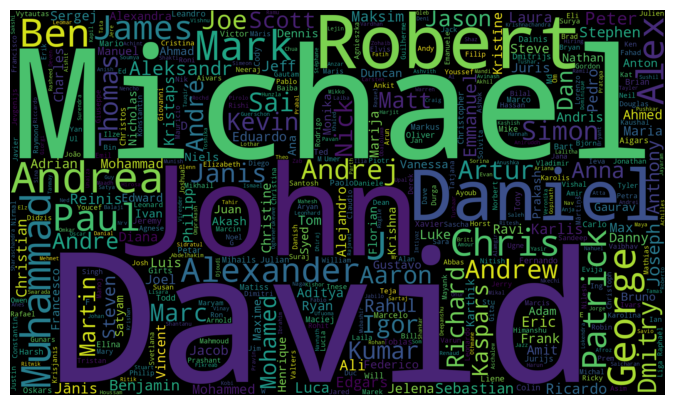

In [40]:
#create most frequent names cloud

lst=[name.split() for name in df1.Cleaned_Name]
flat_lst = [item for sublist in lst for item in sublist]

text = " ".join(flat_lst)
print ("There are {} names.".format(len(text.split())))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1700, height=1000, max_words=500, background_color="black").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Bar plot of the most frequent first names

In [14]:
df_flat_lst = pd.DataFrame({'Names': flat_lst})
df_flat_lst.shape

(2347, 1)

In [15]:
df_flat_lst[df_flat_lst['Names'].str.contains("\.")].head(5) # rows that contain initials


,Names
42,D.
140,J.
217,Mr.
232,Ing.
335,K.


In [16]:
# remove rows in df_flat_lst which has initials

df_flat_lst = df_flat_lst[~df_flat_lst['Names'].str.contains("\.")]


In [17]:
df_flat_lst.shape

(2306, 1)

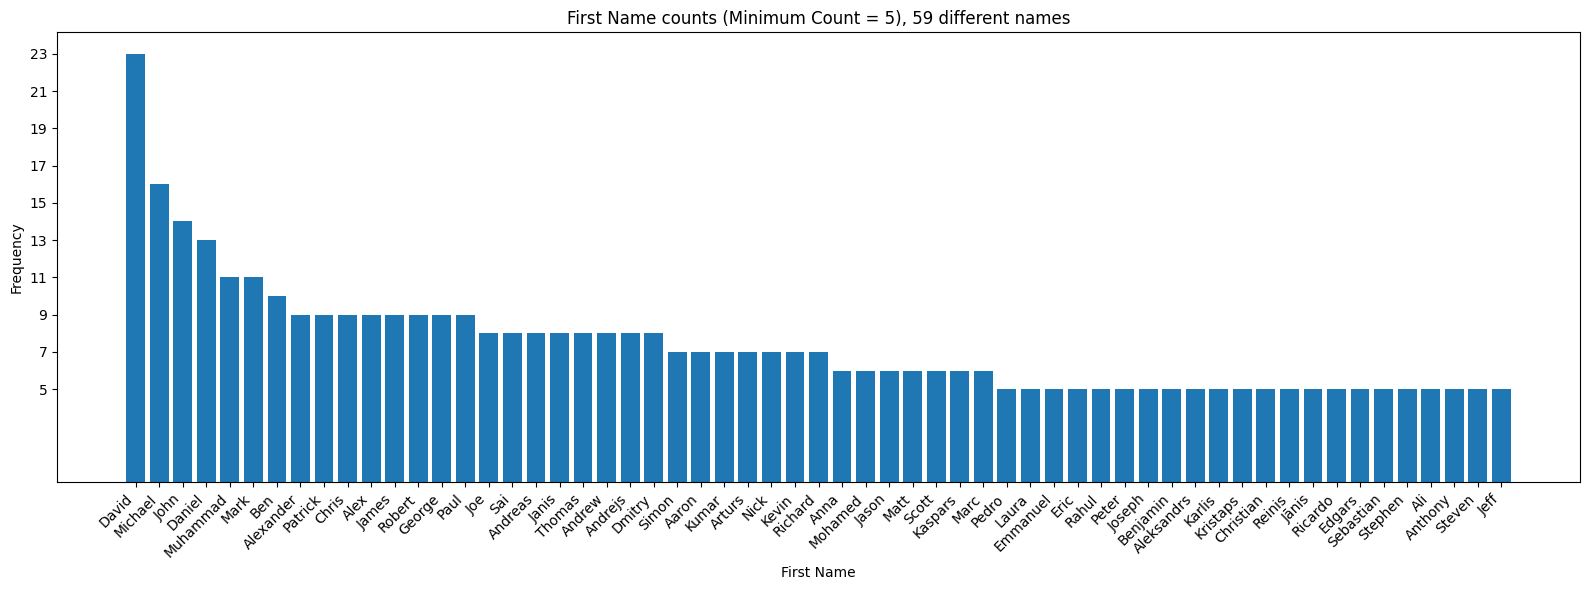

In [18]:
n=5 # minimal count

# Calculate word counts
names = df_flat_lst['Names'].value_counts()

# Filter out words with counts less than n
names = names[names >= n]

# Create the bar plot
plt.figure(figsize=(16, 6))  # Adjust figure size as needed
plt.bar(names.index, names.values)
plt.xlabel("First Name")
plt.ylabel("Frequency")
plt.title(f"First Name counts (Minimum Count = {n}), {len(names)} different names")
plt.xticks(rotation=45, ha="right")
plt.yticks(np.arange(n, max(names.values)+1, 2))   # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Dynamic bar plot

In [19]:
import altair as alt

# Create a DataFrame for Altair

names_df = names.reset_index()
names_df.columns = ['Name', 'Frequency']

# Create the Altair bar chart
alt.Chart(names_df).mark_bar().encode(
    x=alt.X('Name:N', sort='-y', axis=alt.Axis(title='First Name', labelAngle=-45)),
    y=alt.Y('Frequency:Q', axis=alt.Axis(title='Frequency')),
    tooltip=['Name', 'Frequency']
).properties(
    width=800,
    height=400,
    title=f"First Name counts (Minimum Count = {n}), {len(names)} different names"
)


alt.Chart(...)

In [20]:
len(names)

59

# Companies

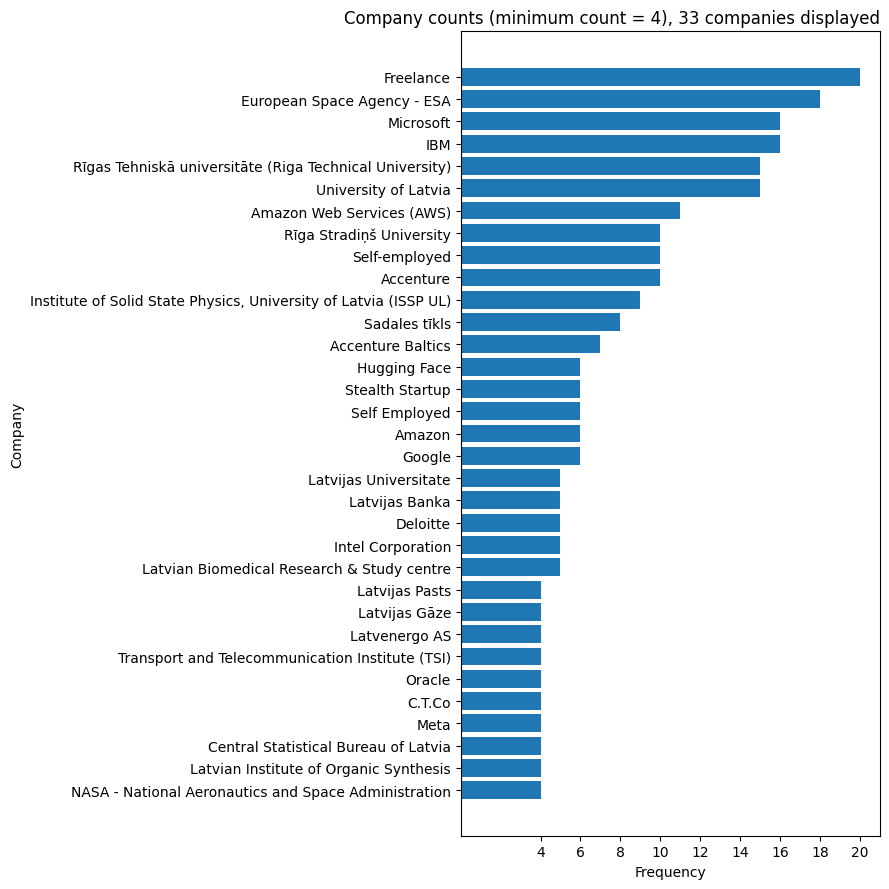

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# minimal count
n=4

# Calculate company counts
companies = df1['Company'].value_counts()

# Filter out companies with counts less than n
companies = companies[companies >= n]

# Create the bar plot
plt.figure(figsize=(9, 9))  # Adjust figure size as needed
plt.barh(companies.index[::-1], companies.values[::-1]) # plot bars in reverse order
plt.xlabel("Frequency")
plt.ylabel("Company")

plt.xlim()
plt.title(f"Company counts (minimum count = {n}), {len(companies)} companies displayed", loc='right')
plt.xticks(np.arange(n, max(companies.values)+1, 2))#, rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [25]:
# Function to get people working in a specific company
def get_people_in_company(company_name):
  df1.loc[:,'human']=df1['First Name']+' '+df1['Last Name']
  people = df1[df1['Company'] == company_name]['human'].tolist()
  return ", ".join(people)

# Example usage: Get the list of people working at 'Google'
# Replace 'Google' with the desired company name
company_name = 'Google'
people_in_google = get_people_in_company(company_name)

print(f"People working at {company_name}: {people_in_google}")

People working at Google: Riccardo Schiavoni, Udaya Bhaskar Cheepurupalli, Sai Nethra Manikonda, Gennadii Donchyts, Swetha Vipparla, Aditya Shah


In [26]:
companies_df = companies.reset_index()
companies_df.columns = ['Company', 'Frequency']

In [27]:
# Apply the function to create the new column
companies_df['People'] = companies_df['Company'].apply(get_people_in_company)
companies_df.head(5)

,Company,Frequency,People
0,Freelance,20,"ibrahim kocaalioglu, Prof. Dr. Hasan Amca, Bed..."
1,European Space Agency - ESA,18,"Alex Chunet, Alireza Taravat, Alessia Garofalo..."
2,Microsoft,16,"Mikal Opdal, Avinash Pandey, Horst Urlberger, ..."
3,IBM,16,"J Jabilo Jose, Ana Gaspar, Isabela Yepes, Mila..."
4,Rīgas Tehniskā universitāte (Riga Technical Un...,15,"Nikitha Sanjay Dabade, Dmitrijs Stepanovs, Kas..."


##Dynamic bar plot

In [28]:
# Create the Altair bar chart
alt.Chart(companies_df).mark_bar().encode(
    x=alt.X('Frequency:Q', axis=alt.Axis(title='Frequency')),
    y=alt.Y('Company:N', sort='-x', axis=alt.Axis(title='Company')), # Sort bars by frequency
    tooltip=['Company', 'Frequency', 'People']
).properties(
    width=600,
    height=800,
    title=f"Company counts (minimum Count = {n}), {len(companies)} companies displayed"
)


alt.Chart(...)

# Positions

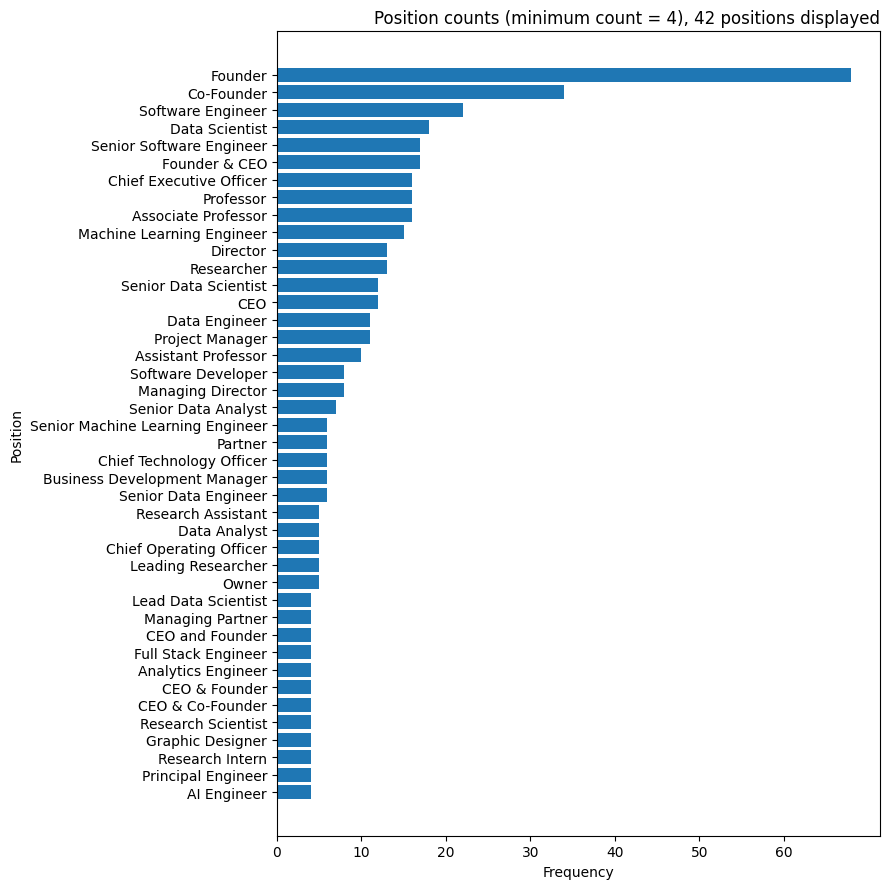

In [29]:
n=4

# Calculate position counts
positions = df1['Position'].value_counts()

# Filter out positions with counts less than n
positions = positions[positions >= n]

# Create the horizontal bar plot with reversed order
plt.figure(figsize=(9, 9))  # Adjust figure size as needed
plt.barh(positions.index[::-1], positions.values[::-1]) # Reverse the index and values
plt.xlabel("Frequency")
plt.ylabel("Position")
plt.title(f"Position counts (minimum count = {n}), {len(positions)} positions displayed", loc='right')
plt.xticks(np.arange(0, max(positions.values)+1, 10))#, rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [31]:
def get_people_by_position(position):
  people = df1[df1['Position'] == position]['human'].tolist()
  return ", ".join(people)

# Example usage: Get the list of people working as 'Data Scientist'
# Replace 'Data Scientist' with the desired company name
position = 'Data Scientist'
people_data_scientist = get_people_by_position(position)

print(f"People working as {position}: {people_data_scientist}")

People working as Data Scientist: Anes Valentic, Kaneez Ayesha, Hari Krishna Sai Durga Prasad Naralasetty, Federico Ricciuti, Dr. Oriana Genolet, Mauro Mariniello, Jack Rodenberg, Nick Jones, André Ferreira, Faten Ben Hassine, Gustavo R Santos, Dr. Niels Ohlsen, Zared Shawver, PhD, Swarup Ranjan Behera, PhD, Saeed Misaghian, PhD, Oskars Treimanis, Evangelos Chatzidimitriou, Valērijs Mihailovs


In [32]:
positions_df = positions.reset_index()
positions_df.columns = ['Position', 'Frequency']

In [33]:
positions_df['People'] = positions_df['Position'].apply(get_people_by_position)
positions_df.head(5)

,Position,Frequency,People
0,Founder,68,"Dan Constantin Cotici, Dennis Palatov, George ..."
1,Co-Founder,34,"Emil Brugal, Gautam Kadian, Guerschon J. Leroi..."
2,Software Engineer,22,"Varun Kumar, Mohammed Imtiyaz Ali, Avinash Pan..."
3,Data Scientist,18,"Anes Valentic, Kaneez Ayesha, Hari Krishna Sai..."
4,Senior Software Engineer,17,"Gleb Stepanov, Hassan Shahzad, Riccardo Schiav..."


In [34]:
# Create the Altair bar chart
alt.Chart(positions_df).mark_bar().encode(
    x=alt.X('Frequency:Q', axis=alt.Axis(title='Frequency')),
    y=alt.Y('Position:N', sort='-x', axis=alt.Axis(title='Position')), # Sort bars by frequency
    tooltip=['Position', 'Frequency', 'People']
).properties(
    width=800,
    height=800,
    title=f"Position counts (minimum Count = {n}), {len(positions)} positions displayed"
)

alt.Chart(...)